In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = np.load('data/PosNegFbGridSearchData_renamed.npz')
# data = np.load('data/ARneg_SensitivityPareto.npy')

run1 = np.load('batch32_iter1/mosa_sobol_posneg_200.npz')
run2 = np.load('batch32_iter10/mosa_sobol_posneg_200.npz')
# run3 = np.load('batch1024_iter1/mosa_sobol_posneg_30.npz')
# run4 = np.load('batch32_iter1/mosa_sobol_posneg_200.npz')

igd = np.load('batch32_iter10/mosa_sobol_posneg_metrics.npz')

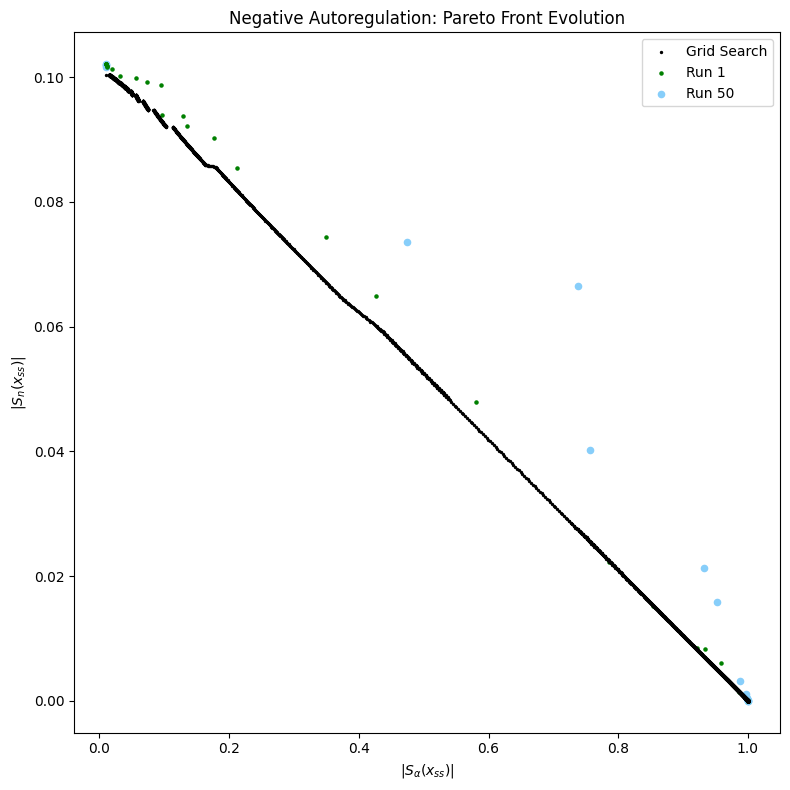

In [11]:
fig, ax1 = plt.subplots(figsize=(8, 8))

ax1.scatter(data['paretoset_SensPair_0_1'][:, 0], data['paretoset_SensPair_0_1'][:, 1], label='Grid Search', color='black', s=2, zorder=5)
# ax1.scatter(data[:, 0], data[:, 1], label='Grid Search', color='black', s=2, zorder=5)
ax1.scatter(run1['f1'], run1['f2'], label='Run 1', color='green', s=5, zorder=4)
ax1.scatter(run2['f1'], run2['f2'], label='Run 50', color='#87CEFA', s=20, zorder=3)
# ax1.scatter(run3['f1'], run3['f2'], label='Run 100', color='#9932CC', s=39, zorder=2)
# ax1.scatter(run4['f1'], run4['f2'], label='Run 200', color='red', s=70, zorder=1)
ax1.legend()

# ax1.set_xlabel(r'$|S_{\beta_x} (x_{ss})|$')
# ax1.set_ylabel(r'$|S_{\beta_x} (y_{ss})|$')
ax1.set_xlabel(r'$|S_{\alpha} (x_{ss})|$')
ax1.set_ylabel(r'$|S_{n} (x_{ss})|$')
ax1.set_title("Negative Autoregulation: Pareto Front Evolution")

# ax2 = fig.add_subplot(1, 2, 2)
# ax2.plot([1, 2], igd['gd'])


# comment_text = f'Running Time = 1'
# fig.text(0.5, 0.02, comment_text, ha='center', va='bottom', fontsize=14, wrap=True)

plt.tight_layout()
plt.show()

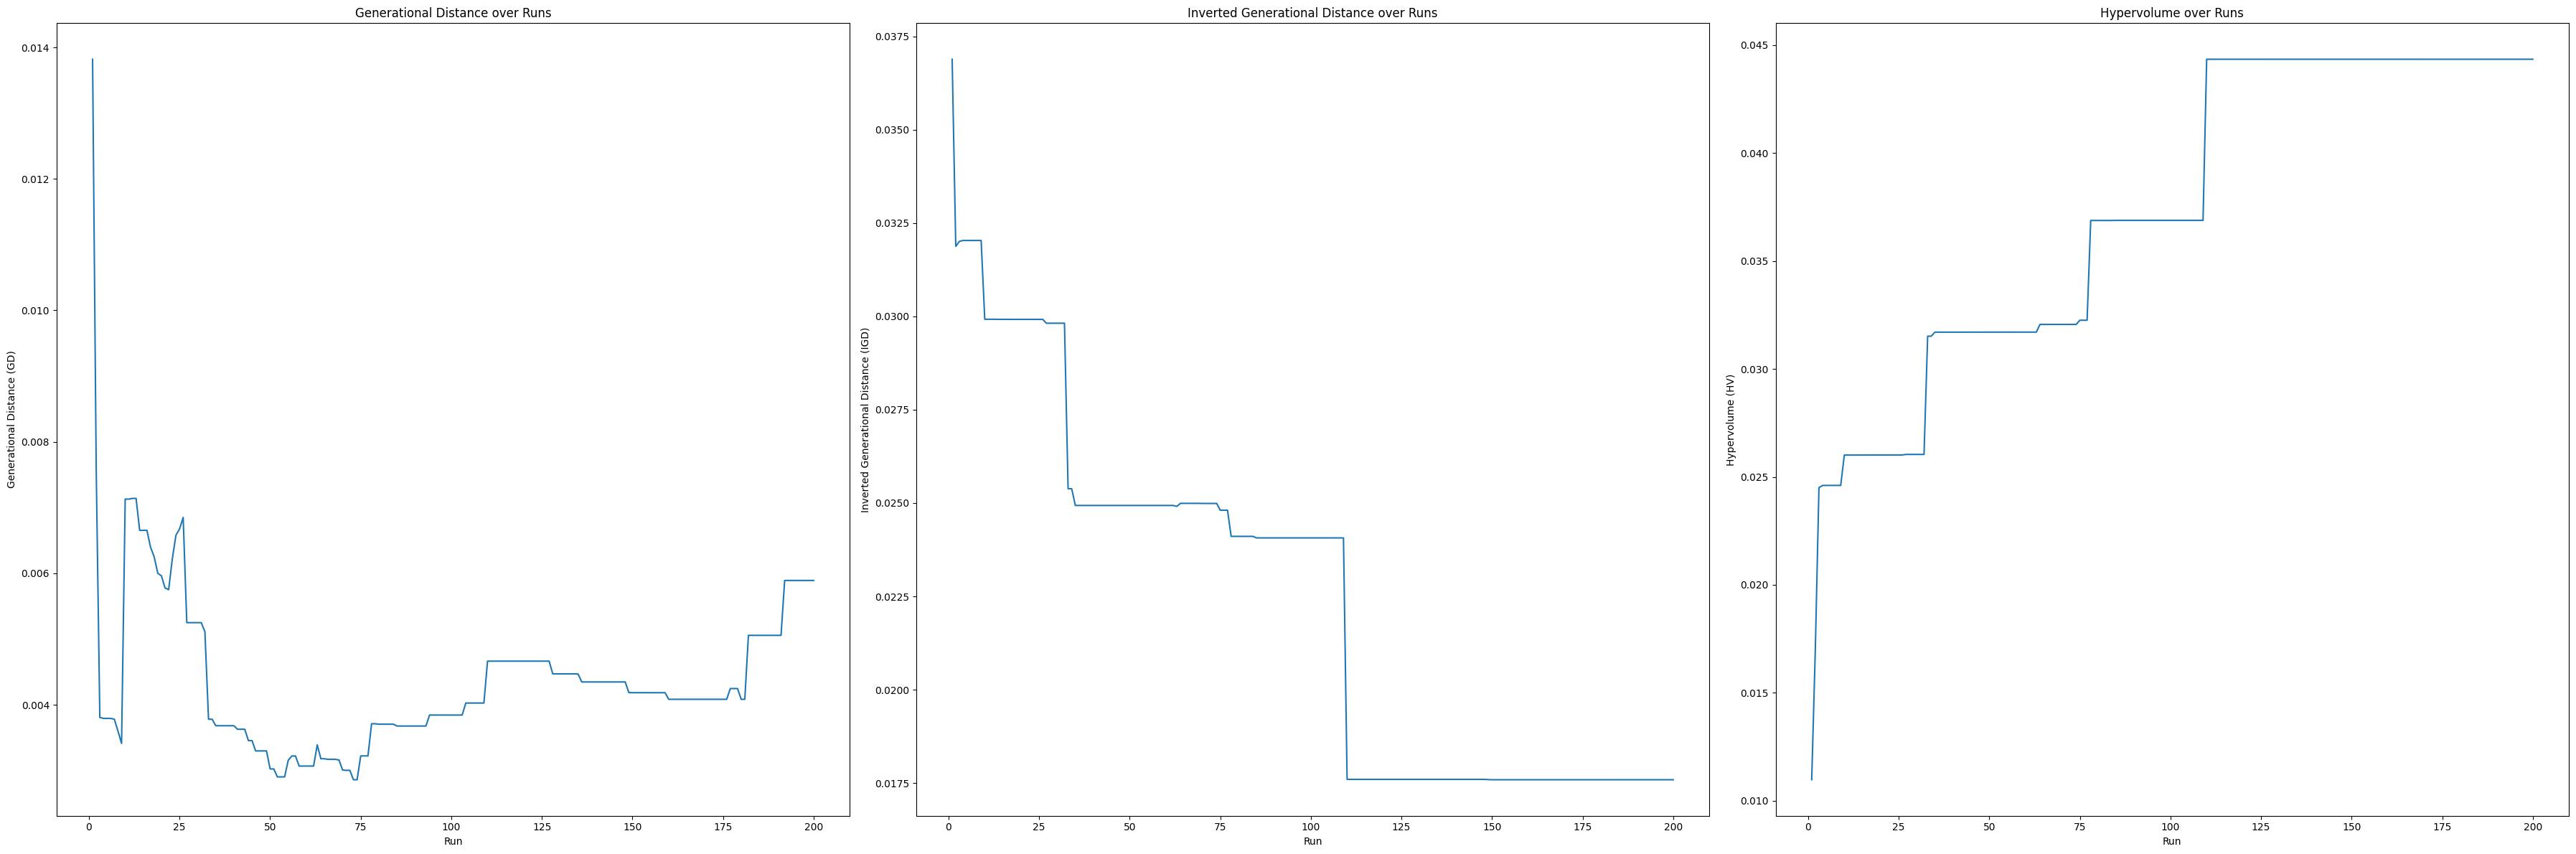

In [14]:
fig = plt.figure(figsize=(36, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot([i for i in range(1, len(igd['gd'])+1)], igd['gd'])
ax1.set_xlabel('Run')
ax1.set_ylabel('Generational Distance (GD)')
ax1.set_title("Generational Distance over Runs")

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot([i for i in range(1, len(igd['igd'])+1)], igd['igd'])
ax2.set_xlabel('Run')
ax2.set_ylabel('Inverted Generational Distance (IGD)')
ax2.set_title("Inverted Generational Distance over Runs")

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot([i for i in range(1, len(igd['hv'])+1)], igd['hv'])
ax3.set_xlabel('Run')
ax3.set_ylabel('Hypervolume (HV)')
ax3.set_title("Hypervolume over Runs")

plt.tight_layout()
plt.show()